In [32]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn import tree
import pydot

In [20]:
df = pd.read_csv('./restaurant.csv', header=0)
df

,alt,bar,fri,hun,pat,price,rain,res,type,est,wait
0,1,0,0,1,1,2,0,1,0,0,1
1,1,0,0,1,2,0,0,0,1,2,0
2,0,1,0,0,1,0,0,0,2,0,1
3,1,0,1,1,2,0,1,0,1,1,1
4,1,0,1,0,2,2,0,1,0,3,0
5,0,1,0,1,1,1,1,1,3,0,1
6,0,1,0,0,0,0,1,0,2,0,0
7,0,0,0,1,1,1,1,1,1,0,1
8,0,1,1,0,2,0,1,0,2,3,0
9,1,1,1,1,2,2,0,1,3,1,0


In [21]:
X = df[['alt','bar','fri','hun','pat','price','rain','res','type','est']].to_numpy()
y = df['wait'].to_numpy()

In [22]:
clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [23]:
print(clf.score(X,y))

1.0


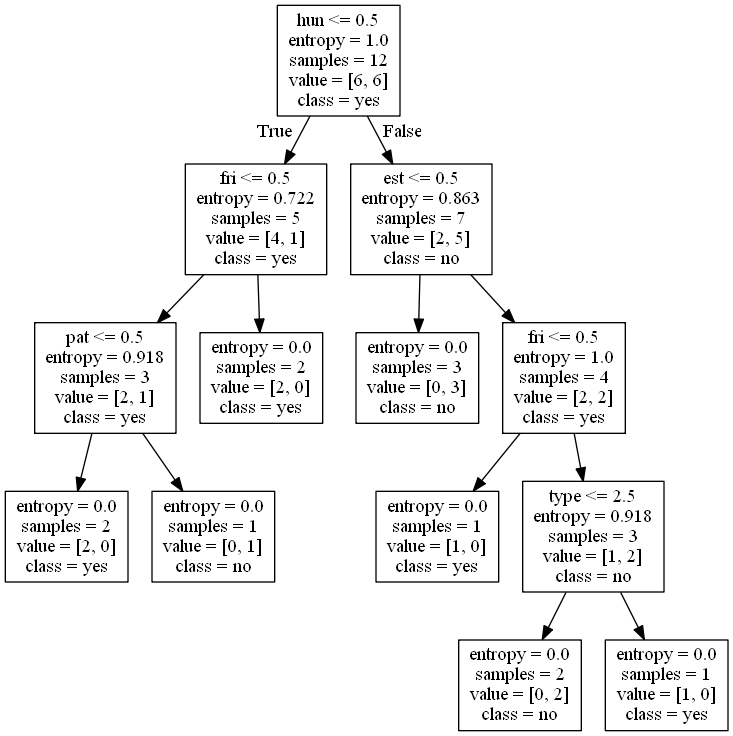

In [24]:
# Visualize the decision tree.
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, class_names=['yes', 'no'], feature_names=['alt','bar','fri','hun','pat','price','rain','res','type','est'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [80]:
mlp = MLPClassifier(random_state=1, max_iter=3000)

hidden_layer_sizes = [(int(x),) for x in range(1,23,1)]

parameters = {'hidden_layer_sizes': hidden_layer_sizes}

clf = GridSearchCV(mlp, parameters, return_train_score=True, cv=6)

clf.fit(X, y)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,), (20,), (21,), (22,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [81]:
print(clf.best_params_)
print(clf.score(X,y))

{'hidden_layer_sizes': (7,)}
1.0


In [82]:
df = pd.DataFrame(clf.cv_results_)

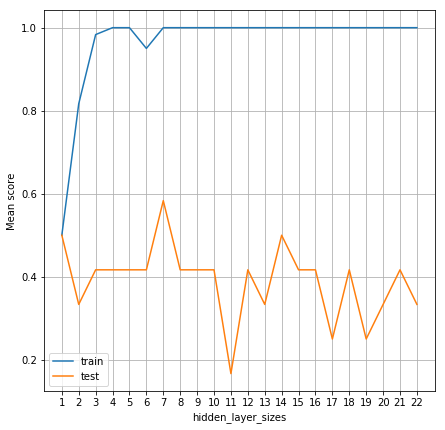

In [83]:
mean_test_score = df['mean_test_score']

mean_train_score = df['mean_train_score']

plt.figure(figsize=(7,7))
plt.plot(range(1,23,1), mean_train_score, label='train')
plt.plot(range(1,23,1), mean_test_score, label='test')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Mean score')
plt.legend()
plt.grid()
plt.xticks(range(1,23,1))
plt.show()